# Convolutional Neural Networks

### Convolutions

Like you have seen on the course edx pages, the basic building block of CNNs is the convolution operation. For 2D (black and white) images, the *kernel* or *filter* is a small grid of numbers (matrix) which is used to detect features in the input image. Luckily, this process is easy to implement and visualize in Python.

![ConvURL](https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif "Michael Plotke. CC-BY 3.0")

In [1]:
import numpy as np
from scipy import signal
from scipy import misc
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
cd = Path.cwd()
fn = cd / "assets" / "harbour.jpg"
if fn.exists(): print(f'File {fn} located.')

img = np.array(Image.open(fn).convert('L')) #converted to grayscale for simplicity

File C:\Users\Peder\Documents\CBM-101\CBM101\H_Neural_Networks\assets\harbour.jpg located.


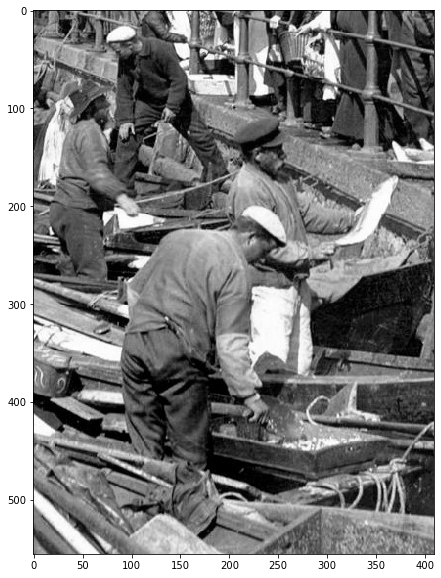

In [3]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
## Uncomment the different kernels and see how they affect the images.

kernel = np.array([[0,0,0],
                   [1,0,-1],
                   [0,0,0]])


#kernel = np.array([[.5,1,.5],
#                   [1,2,1],
#                   [.5,1,.5]])
#
#kernel = np.array([[-1,-1,-1],
#                   [1,1,1],
#                   [0,0,0]])

output = signal.convolve2d(img, kernel, mode='same')

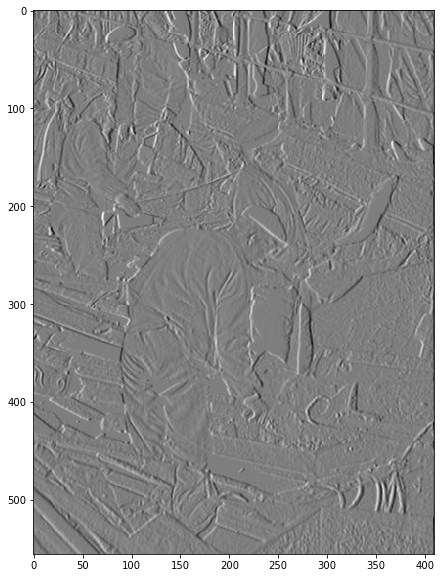

In [5]:
fig = plt.figure(figsize=(10,10))
plt.imshow(output, cmap='gray')
plt.show()

This kernel is a common *edge detecting* kernel, identifying specifically vertical edges.

#### Ex.1: a) Change the kernel so that it will display horisontal edges instead of vertical ones. b) What happens if you convolve the input with the following kernel?
$$
  K =
  \left[ {\begin{array}{ccc}
   0 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 0 \\
  \end{array} } \right]
$$

The output image above is known as a *feature map*. Multiple such maps are created from the input layer in CNNs. After passing it through an activation function (e.g. ReLU), the next standard step is max-pooling, reducing the size of the feature maps. Typically, these steps (convolution-ReLU-pooling) are repeated a number of times, before it is relayed to a fully connected layer at the end (an ordinary multilayer perceptron). 

Luckily we don't have to worry about deciding this kernel - this is exactly what the CNN learn during training!

![Aphex34 CC-BY 4.0](assets/end_to_end_modified_from_Aphex34_CCBYSA4.0.png)
*Modified from Aphex34, CC-BY 4.0* 

To demonstrate the implementation of deep learning in Python, we proceed with the MNIST dataset that was analyzed in `2_Feed_Forward_Neural_Networks`. We will work with the Python library `Tensorflow`, through its submodule `Keras`, a high-level API which streamlines the building, training and testing of deep learning models. 

( modified from [Custom training: walktrough](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb) -  https://www.tensorflow.org/tutorials/images/cnn )

# A Convolutional Neural Network (CNN) in TensorFlow

In [6]:
# Copyright 2019 The TensorFlow Authors
#
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training our model will take just a few lines of code.


### Import TensorFlow

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


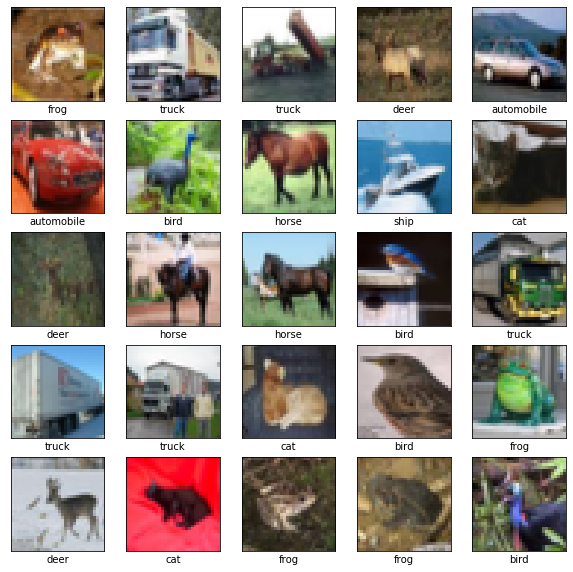

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.

A neural network architecture has to be precisely defined - how many neurons are there in each layer, and how are they organized? This needs to reflect the expected input. Now in this case we will work with images of 32 by 32 pixels, plus 3 color channels (RGB). Since there are three colours we get the shape (32, 32, 3).

Below is code to build a neural network, by adding one layer at a time using `model.add`. **Ex.XX. Specify the `input_shape` in the input layer below to be of correct dimensions**.



In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=####))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Here's the complete architecture of our model.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

### Compile and train the model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 41s 826us/sample - loss: 1.5230 - accuracy: 0.4423 - val_loss: 1.2158 - val_accuracy: 0.5659
Epoch 2/10
50000/50000 [==============================] - 41s 822us/sample - loss: 1.1544 - accuracy: 0.5939 - val_loss: 1.1782 - val_accuracy: 0.5909
Epoch 3/10
50000/50000 [==============================] - 38s 754us/sample - loss: 1.0192 - accuracy: 0.6409 - val_loss: 1.0778 - val_accuracy: 0.6160
Epoch 4/10
50000/50000 [==============================] - 37s 745us/sample - loss: 0.9249 - accuracy: 0.6762 - val_loss: 0.9486 - val_accuracy: 0.6631ccuracy: 0.
Epoch 5/10
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.8506 - accuracy: 0.7029 - val_loss: 0.9245 - val_accuracy: 0.6768
Epoch 6/10
50000/50000 [==============================] - 44s 885us/sample - loss: 0.7937 - accuracy: 0.7213 - val_loss: 0.9201 - val_accuracy: 0.6785
Epoch 7/10
50000/50000 [===========

### Evaluate the model

10000/1 - 2s - loss: 1.0691 - accuracy: 0.6867


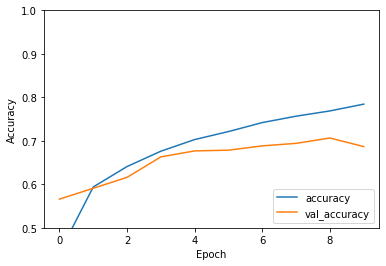

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [16]:
print(test_acc)

0.6867


Our simple CNN has achieved a test accuracy of about 70%. Not bad for a few lines of code! For another CNN style, see an example using the Keras subclassing API and a `tf.GradientTape` [here](https://www.tensorflow.org/tutorials/quickstart/advanced).

Now that you have become familiarised with CNNs in Keras for classification, let's look at another important application of CNNs.

# Image segmentation

The pinacle of deep learning in radiology is automatic segmentation. This has particular relevance to precise localization of tumours for surgery, but also is needed to quantify size for long term monitoring etc. Segmentation is also interesting for a number of scientific endeavors, such as measuring the size of different brain regions. The techniques learned here 


##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [17]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image segmentation

This tutorial focuses on the task of image segmentation, using a modified [U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/).

## What is image segmentation?
So far you have seen image classification, where the task of the network is to assign a label or class to an input image. However, suppose you want to know where an object is located in the image, the shape of that object, which pixel belongs to which object, etc. In this case you will want to segment the image, i.e., each pixel of the image is given a label. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging to name a few.

The dataset that will be used for this tutorial is the [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/), created by Parkhi *et al*. The dataset consists of images, their corresponding labels, and pixel-wise masks. The masks are basically labels for each pixel. Each pixel is given one of three categories :

*   Class 1 : Pixel belonging to the pet.
*   Class 2 : Pixel bordering the pet.
*   Class 3 : None of the above/ Surrounding pixel.

In [2]:
import tensorflow as tf
import sys

In [5]:
# Uncomment if you get an import error on tensorflow_datasets
#!{sys.executable} -m pip install tensorflow_datasets

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
#tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

## Download the Oxford-IIIT Pets dataset

The dataset is already included in TensorFlow datasets, all that is needed to do is download it. The segmentation masks are included in version 3.0.0, which is why this particular version is used.

In [7]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

The following code performs a simple **augmentation** of flipping an image, a trick to effectively increase the sample size. In addition, the image is normalized to [0,1], which is an important processing step for neural networks. Finally, as mentioned above the pixels in the segmentation mask are labeled either {1, 2, 3}. For the sake of convinience, let's subtract 1 from the segmentation mask, resulting in labels that are : {0, 1, 2}.

In [8]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [9]:
@tf.function # this line of code is a decorator, and expands the functionality of load_image_train.
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
  
    # do a flip with 0.5 probability
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
  
    input_image, input_mask = normalize(input_image, input_mask)
  
    return input_image, input_mask

In [10]:
def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
  
    input_image, input_mask = normalize(input_image, input_mask)
  
    return input_image, input_mask

The dataset already contains the required splits of test and train and so let's continue to use the same split.

In [11]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [13]:
# apply (map) the loading functions to each image in the dataset
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [14]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

Let's take a look at an image example and it's correponding mask from the dataset.

In [15]:
def display(display_list):
    plt.figure(figsize=(15, 15))
  
    title = ['Input Image', 'True Mask', 'Predicted Mask']
  
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

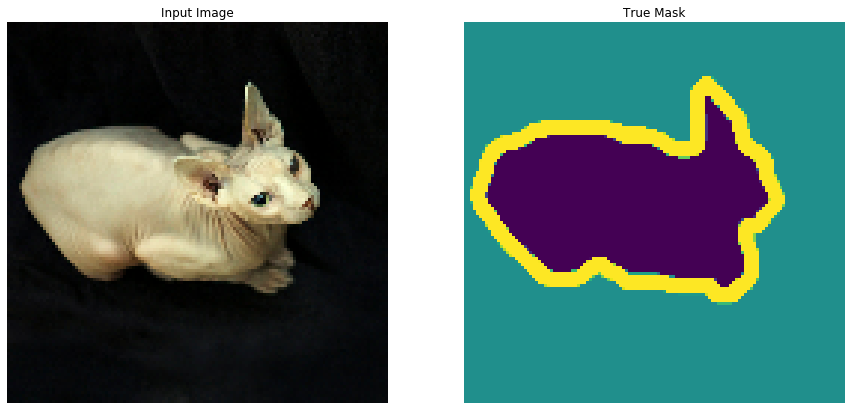

In [66]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

## Define the model
The model being used here is a modified U-Net. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder. Thus, the encoder for this task will be a pretrained MobileNetV2 model, whose intermediate outputs will be used, and the decoder will be the upsample block already implemented in TensorFlow Examples in the [Pix2pix tutorial](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py). 

The reason to output three channels is because there are three possible labels for each pixel. Think of this as multi-classification where each pixel is being classified into three classes.

In [17]:
OUTPUT_CHANNELS = 3

As mentioned, the encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in [tf.keras.applications](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/applications). The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

In [18]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

The decoder/upsampler is simply a series of upsample blocks implemented in TensorFlow examples.

In [19]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [20]:
def unet_model(output_channels):
  
    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same', activation='softmax')  #64x64 -> 128x128
  
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs
  
    # Downsampling through the model
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])
  
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])
  
    x = last(x)
  
    return tf.keras.Model(inputs=inputs, outputs=x)

## Train the model
Now, all that is left to do is to compile and train the model. The loss being used here is losses.sparse_categorical_crossentropy. The reason to use this loss function is because the network is trying to assign each pixel a label, just like multi-class prediction. In the true segmentation mask, each pixel has either a {0,1,2}. The network here is outputting three channels. Essentially, each channel is trying to learn to predict a class, and losses.sparse_categorical_crossentropy is the recommended loss for such a scenario. Using the output of the network, the label assigned to the pixel is the channel with the highest value. This is what the create_mask function is doing.

In [21]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Have a quick look at the resulting model architecture:

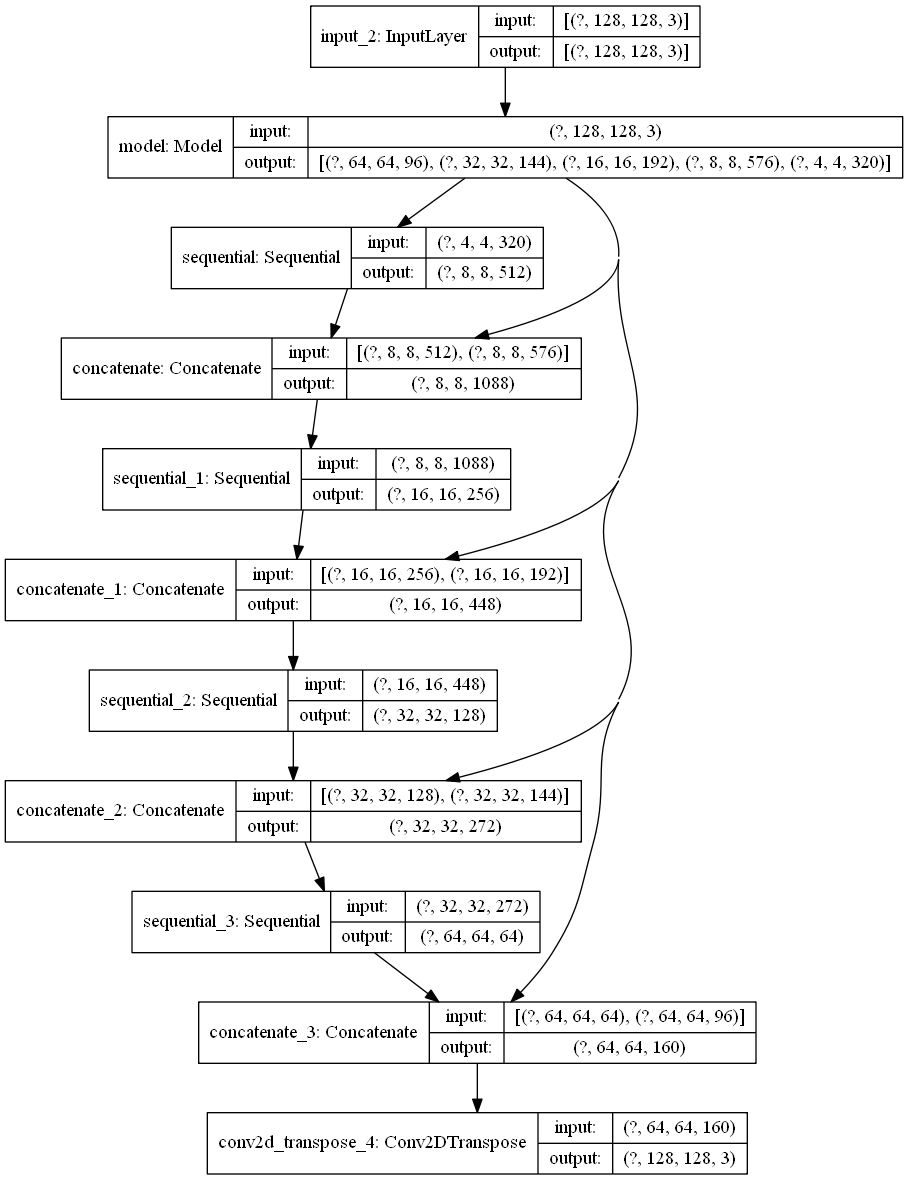

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.

In [23]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [24]:
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

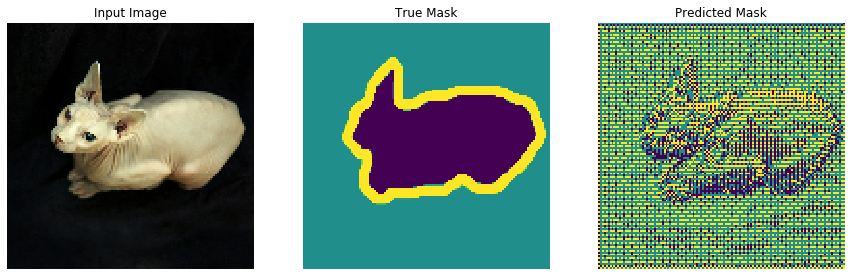

In [25]:
show_predictions()

Let's observe how the model improves while it is training. To accomplish this task, a callback function is defined below. 

In [26]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

Usually, we would run the below code for 20 epochs, but as long as you are using your CPU as opposed to a GPU (as intended for CBM101), we have reduced it to just a single epoch. However, in a research setting you would use a GPU, and the code would run in seconds. As a consequence, the final model will not be very accurate. However, it will be far from useless, and you can achieve an accuracy just short of 0.9 if you run all 20 epochs.

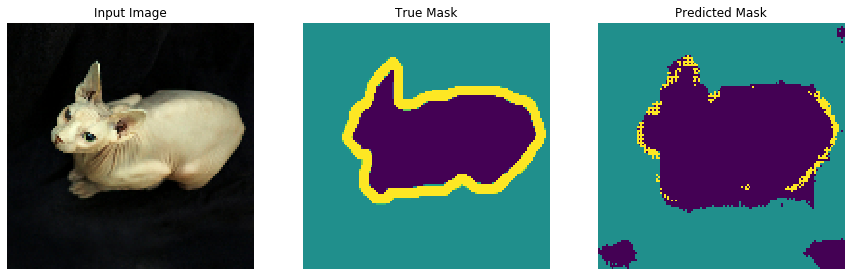


Sample Prediction after epoch 1

57/57 [==============================] - 1339s 23s/step - loss: 0.4986 - accuracy: 0.7977 - val_loss: 0.6365 - val_accuracy: 0.7995


In [27]:
#EPOCHS = 20
EPOCHS = 1
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

In [29]:
#
#loss = model_history.history['loss']
#val_loss = model_history.history['val_loss']
#
#epochs = range(EPOCHS)
#
#plt.figure()
#plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'bo', label='Validation loss')
#plt.title('Training and Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss Value')
#plt.ylim([0, 1])
#plt.legend()
#plt.show()

## Make predictions

Let's make some predictions. In the interest of saving time, the number of epochs was kept small, but you may set this higher to achieve more accurate results.

Run the below cell to predict a random sample from the test set. You can run it multiple times to get an idea of how well the model works.

Processing...


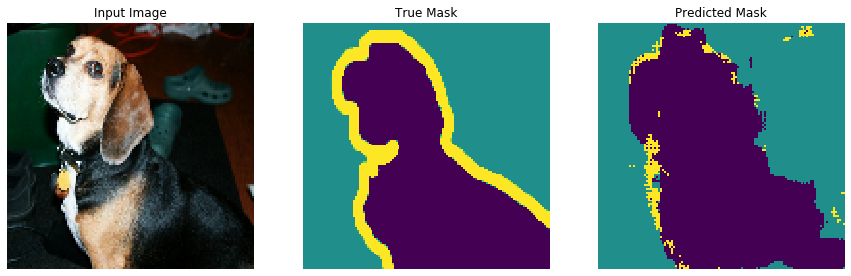

In [108]:
for image, mask in test.cache().shuffle(1000).batch(BATCH_SIZE).take(1):
    print("Processing...")
    sample_image, sample_mask = image, mask
    pred_mask = model.predict(sample_image)
    display([image[0], mask[0], create_mask(pred_mask)])